In [1]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (6,3)

In [2]:
df = pd.read_excel('MeMi_Endowment_list.xlsx')

In [3]:
print(df.shape)
df.head()

(1064, 8)


,Subjects,Item,Type,WTA_Test,WTP_Test,WTA_Plac,WTP_Plac,Market Price
0,Subj1,gin,h,20.0,20.0,15.0,20.0,24
1,Subj1,beer set,h,15.0,10.0,15.0,10.0,14
2,Subj1,video game,h,10.0,10.0,10.0,7.0,25
3,Subj1,helicopter,h,60.0,45.0,75.0,50.0,36
4,Subj1,car model,h,25.0,20.0,35.0,30.0,19


In [4]:
df1 = pd.melt(df, id_vars=['Subjects','Item','Type','Market Price'], value_vars=['WTA_Test','WTA_Plac'], value_name='WTA')
df1['Test'] = 0
df1.loc[df1.variable.str.contains('Test'),'Test'] = 1
df1.drop('variable', axis=1, inplace = True)
df2 = pd.melt(df, id_vars=['Subjects','Item','Type','Market Price'], value_vars=['WTP_Test','WTP_Plac'], value_name='WTP')
df2['Test'] = 0
df2.loc[df2.variable.str.contains('Test'),'Test'] = 1
df2.drop('variable', axis=1, inplace = True)
df = df1.merge(df2)

In [5]:
df.drop(df.index[(df.WTA.isin([0, np.nan])) | (df.WTP.isin([0, np.nan]))], inplace = True)

In [6]:
df['WTA/WTP'] = df.WTA/df.WTP
df['relWTA'] = (df.WTA-df['Market Price'])/df['Market Price']
df['relWTP'] = (df.WTP-df['Market Price'])/df['Market Price']
df['logAP'] = np.log(df['WTA/WTP'])

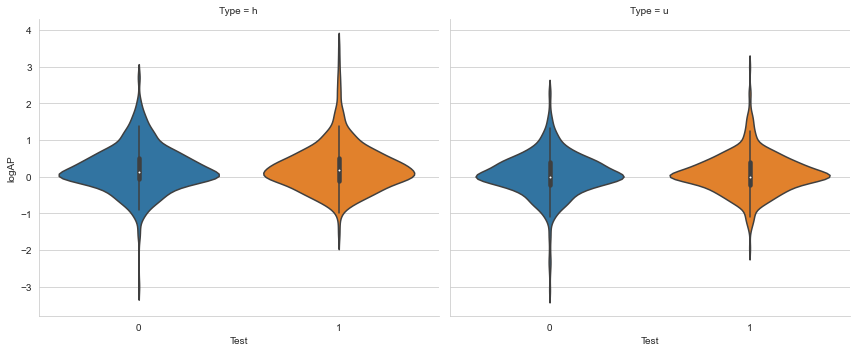

In [7]:
g = sns.catplot(x="Test", y="logAP",
                col="Type",
                data=df, kind="violin",
                height=5, aspect=1.2);

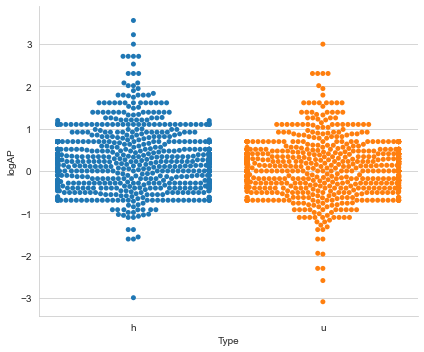

In [8]:
g = sns.catplot(x="Type", y="logAP",            
                data=df, kind="swarm",
                height=5, aspect=1.2);

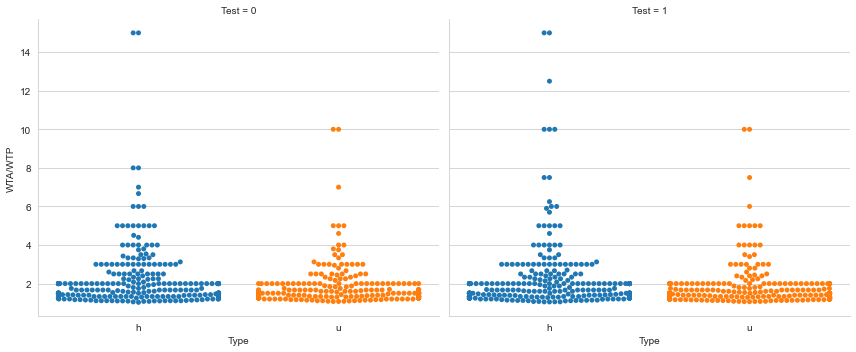

In [9]:
g = sns.catplot(x="Type", y="WTA/WTP",            
                data=df[(df["WTA/WTP"]>1)&(df["WTA/WTP"]<20)], kind="swarm", col = "Test",
                height=5, aspect=1.2);

In [10]:
list_h = list(pd.unique(df.loc[df.Type =='h', 'Item']))
list_u = list(pd.unique(df.loc[df.Type =='u', 'Item']))
print(len(list_h), len(list_u))

14 14


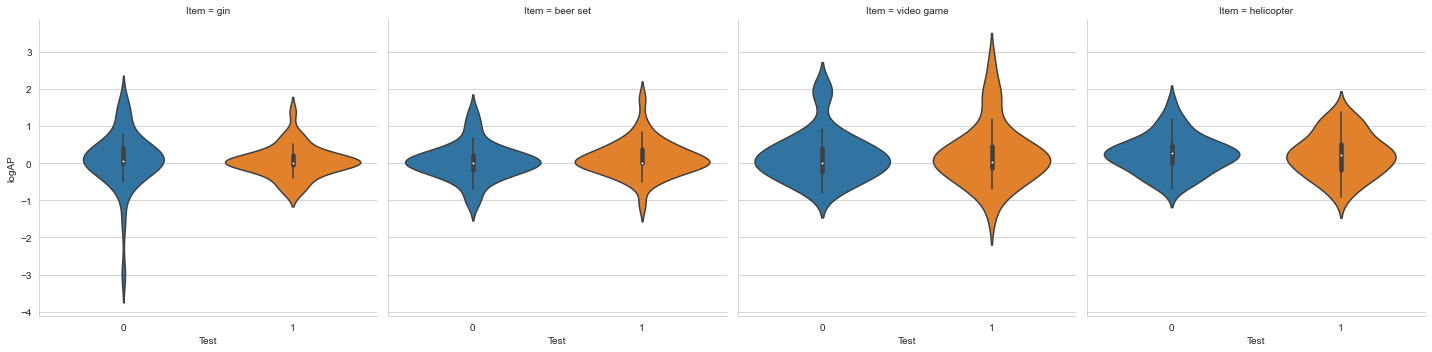

In [11]:
g = sns.catplot(x="Test", y="logAP",
                col="Item", 
                data=df[df.Item.isin(list_h[:4])], kind="violin");

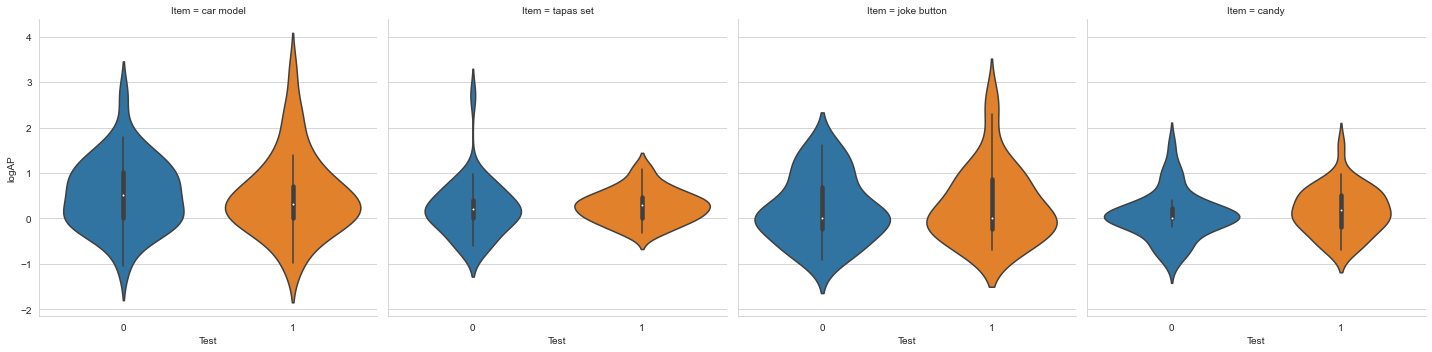

In [12]:
g = sns.catplot(x="Test", y="logAP",
                col="Item", 
                data=df[df.Item.isin(list_h[4:8])], kind="violin");

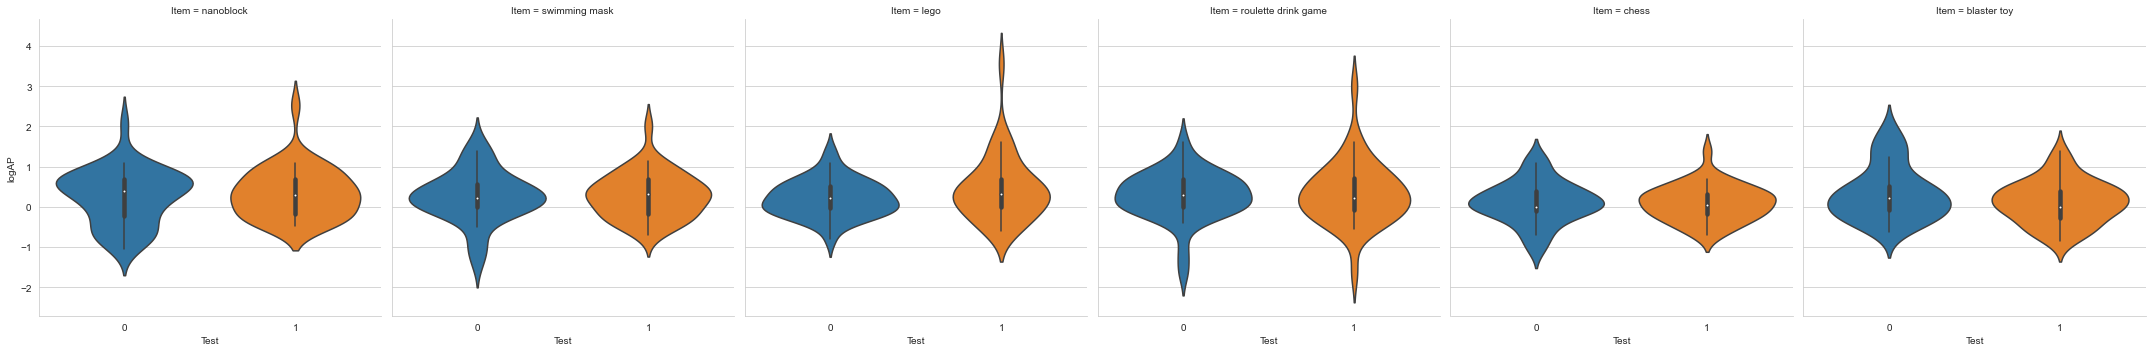

In [13]:
g = sns.catplot(x="Test", y="logAP",
                col="Item", 
                data=df[df.Item.isin(list_h[8:])], kind="violin");

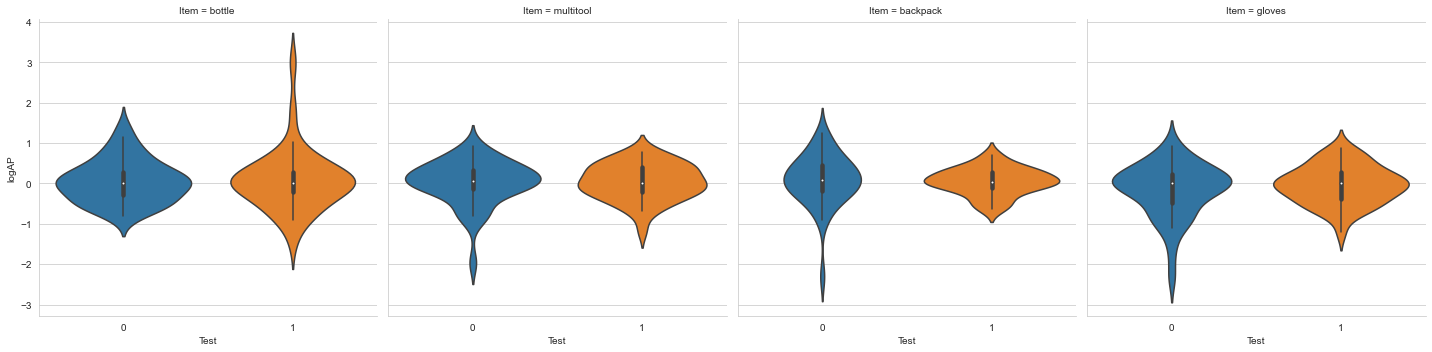

In [14]:
g = sns.catplot(x="Test", y="logAP",
                col="Item", 
                data=df[df.Item.isin(list_u[:4])], kind="violin");

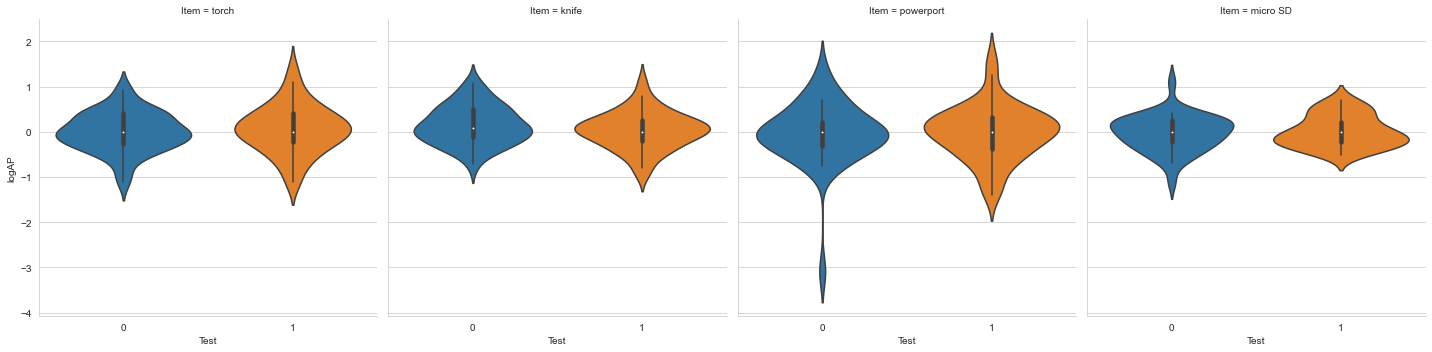

In [15]:
g = sns.catplot(x="Test", y="logAP",
                col="Item", 
                data=df[df.Item.isin(list_u[4:8])], kind="violin");

In [16]:
df.head()

,Subjects,Item,Type,Market Price,WTA,Test,WTP,WTA/WTP,relWTA,relWTP,logAP
0,Subj1,gin,h,24,20.0,1,20.0,1.000000,-0.166667,-0.166667,0.000000
1,Subj1,beer set,h,14,15.0,1,10.0,1.500000,0.071429,-0.285714,0.405465
2,Subj1,video game,h,25,10.0,1,10.0,1.000000,-0.600000,-0.600000,0.000000
3,Subj1,helicopter,h,36,60.0,1,45.0,1.333333,0.666667,0.250000,0.287682
4,Subj1,car model,h,19,25.0,1,20.0,1.250000,0.315789,0.052632,0.223144


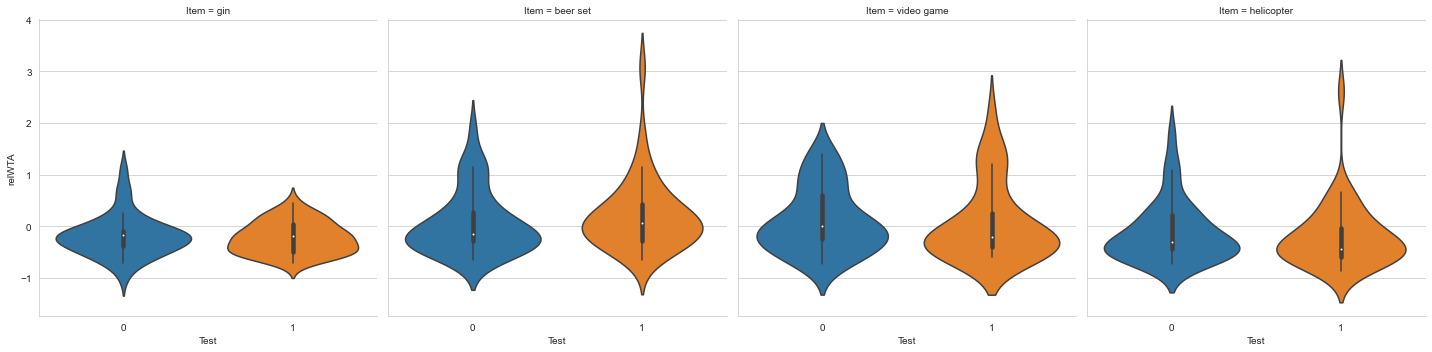

In [18]:
g = sns.catplot(x="Test", y="relWTA",
                col="Item", 
                data=df[df.Item.isin(list_h[:4])], kind="violin");

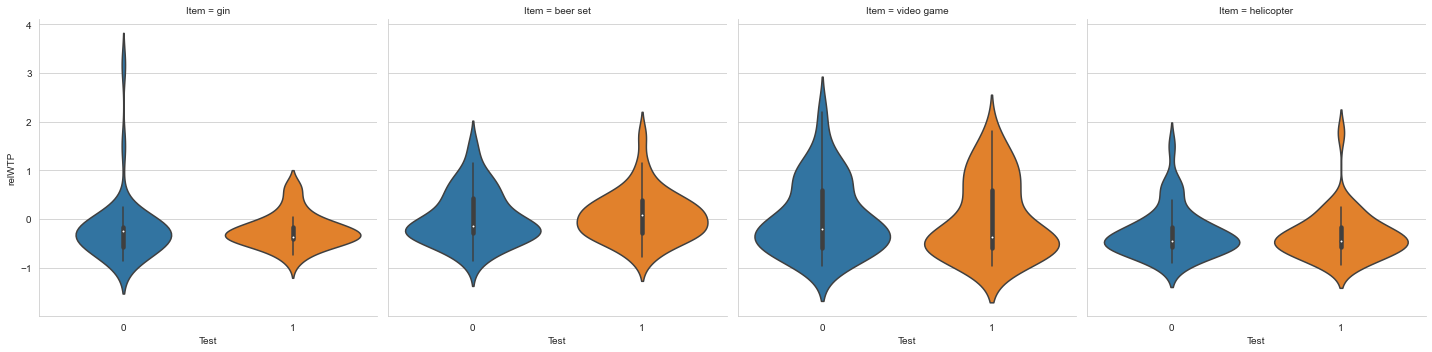

In [19]:
g = sns.catplot(x="Test", y="relWTP",
                col="Item", 
                data=df[df.Item.isin(list_h[:4])], kind="violin");

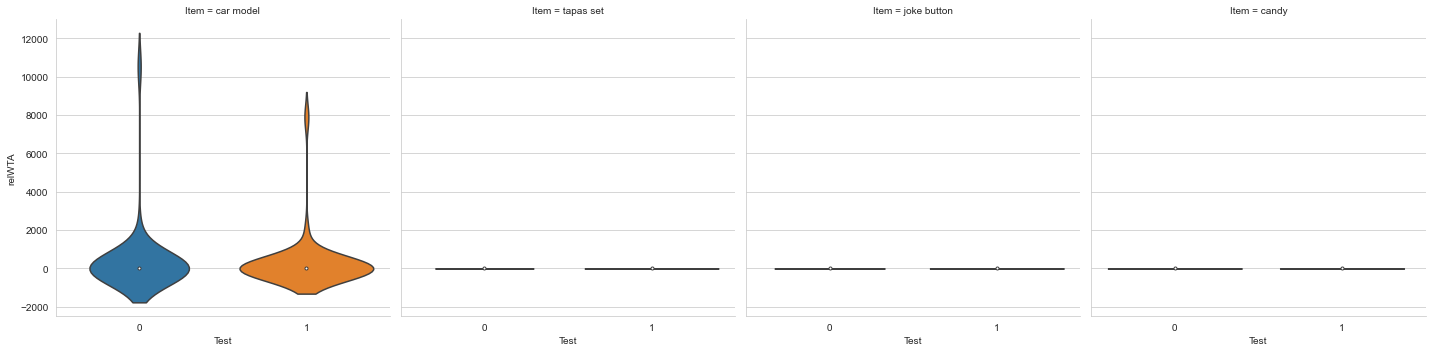

In [21]:
g = sns.catplot(x="Test", y="relWTA",
                col="Item", 
                data=df[df.Item.isin(list_h[4:8])], kind="violin");

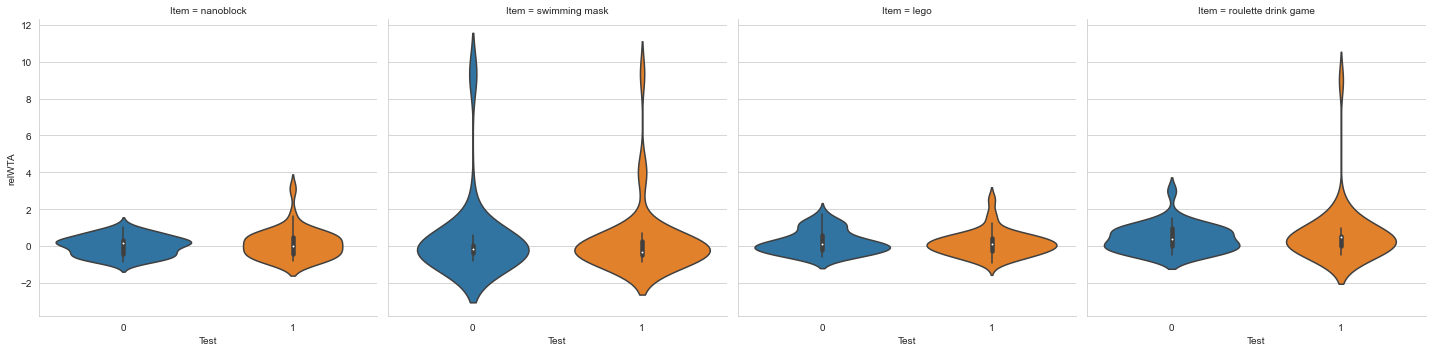

In [22]:
g = sns.catplot(x="Test", y="relWTA",
                col="Item", 
                data=df[df.Item.isin(list_h[8:12])], kind="violin");